In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pemilihan Model Terbaik dalam Prediksi Curah Hujan di Karawang 

Dalam mewujudkan sumber daya manusia yang berkualitas di Indonesia, negara telah menjamin pemenuhan hak asasi manusia (HAM) yang tercantum dalam Undang-Undang Dasar Negara Republik Indonesia tahun 1945. Salah satu upaya penjaminan HAM adalah melalui pangan sebagai kebutuhan utama manusia. Dikutip dari Firmana et. al. (2016), kebutuhan pangan utama nasional, yaitu beras, mencapai 114.8 kg per kapita per tahun pada tahun 2014, dan beras masih menjadi pangan pokok utama dibandingkan sumber pangan lainnya.

Karawang merupakan salah satu kabupaten di Jawa Barat yang merupakan sentra produksi padi. Pada tahun 2014, tercatat mengalami penurunan dengan produksi padi tahun ini sebesar 1.4 juta ton atau setara dengan 9.85% dari total produksi padi di Jawa Barat. Faktor pengaruh produksi padi, salah satunya dipicu akibat perubahan iklim (Ruminta 2016). Perubahan iklim menyebabkan terjadinya perubahan pola curah hujan dan hal ini berisiko besar terhadap fase pertumbuhan dan perkembangan tanaman padi.

Untuk itu, pada kali ini akan dilakukan prediksi curah hujan sebagai salah satu faktor pengaruh produksi padi di Karawang untuk periode mendatang melalui pemodelan time series. 

# Introduction

Data yang digunakan dalam pemodelan ini memiliki tiga variabel bebas dan satu variabel respon. Variabel bebas meliputi indeks iklim ekstrem, meliputi Indeks PDO, Indeks QBO, dan SOI. Variabel respon yang dipilih merupakan curah hujan. Data ini merupakan data time series bulanan dengan periode waktu data dari Januari 1958 hingga September 2018.

# Data Loading and Preparation

## Unggah Data PDO

In [3]:
pdo = pd.read_excel("Bahan Project - PDO dan ENSO.xlsx",sheet_name='PDO', index_col='YEAR')
pdo = pdo.stack().reset_index()
pdo.columns = ['YEAR', 'MONTH', 'PDO']
pdo['DATE'] = pdo['YEAR'].astype(str) + ' ' + pdo['MONTH'].str.title()
pdo = pdo[['DATE','PDO']]
pdo['DATE'] = pd.to_datetime(pdo['DATE'],format="%Y %b")
pdo.head()

DATE   PDO
0 1900-01-01  0.04
1 1900-02-01  1.32
2 1900-03-01  0.49
3 1900-04-01  0.35
4 1900-05-01  0.77

## Unggah Data QBO

In [4]:
qbo = pd.read_excel("Bahan Project - PDO dan ENSO.xlsx",sheet_name='QBO', index_col='YEAR')
qbo = qbo.stack().reset_index()
qbo.columns = ['YEAR', 'MONTH', 'QBO']
qbo['DATE'] = qbo['YEAR'].astype(str) + ' ' + qbo['MONTH'].str.title()
qbo = qbo[['DATE','QBO']]
qbo['DATE'] = pd.to_datetime(qbo['DATE'],format="%Y %b")
qbo.head()

DATE   QBO
0 1948-01-01 -4.44
1 1948-02-01 -5.78
2 1948-03-01 -7.31
3 1948-04-01 -6.70
4 1948-05-01 -5.57

## Unggah Data SOI

In [5]:
anomalislp = pd.read_excel("Bahan Project - PDO dan ENSO.xlsx",sheet_name='AnomaliSLP', skiprows=3, index_col='YEAR')
anomalislp = anomalislp.stack().reset_index()
anomalislp.columns = ['YEAR', 'MONTH', 'AnomaliSLP']
anomalislp.head()

YEAR MONTH  AnomaliSLP
0  1951   JAN         2.5
1  1951   FEB         1.5
2  1951   MAR        -0.2
3  1951   APR        -0.5
4  1951   MAY        -1.1

In [6]:
# Hitung Indeks SOI
avg_anomaliSLP = np.mean(anomalislp['AnomaliSLP'])
stdev_anomaliSLP = np.std(anomalislp['AnomaliSLP'])
anomalislp['SOI'] = np.round((anomalislp['AnomaliSLP'] - avg_anomaliSLP)/ stdev_anomaliSLP, 2)
anomalislp.head()

YEAR MONTH  AnomaliSLP   SOI
0  1951   JAN         2.5  1.45
1  1951   FEB         1.5  0.81
2  1951   MAR        -0.2 -0.29
3  1951   APR        -0.5 -0.48
4  1951   MAY        -1.1 -0.86

In [7]:
anomalislp['DATE'] = anomalislp['YEAR'].astype(str) + ' ' + anomalislp['MONTH'].str.title()
soi = anomalislp[['DATE','SOI']]
soi['DATE'] = pd.to_datetime(soi['DATE'],format="%Y %b")
soi.head()

C:\Users\ACER\AppData\Local\Temp\ipykernel_25896\2312114373.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soi['DATE'] = pd.to_datetime(soi['DATE'],format="%Y %b")


DATE   SOI
0 1951-01-01  1.45
1 1951-02-01  0.81
2 1951-03-01 -0.29
3 1951-04-01 -0.48
4 1951-05-01 -0.86

## Unggah Data CH (Curah Hujan) Bulanan

In [8]:
ch = pd.read_csv('CHBulananKarawang.csv')
ch.columns = ['DATE', 'CH']
ch['DATE'] = pd.to_datetime(ch['DATE'])
ch.head(3)

DATE   CH
0 1958-01-01  249
1 1958-02-01  320
2 1958-03-01  230

In [9]:
print(f'PDO : {np.min(pdo["DATE"])} - {np.max(pdo["DATE"])}')
print(f'QBO : {np.min(qbo["DATE"])} - {np.max(qbo["DATE"])}')
print(f'SOI : {np.min(soi["DATE"])} - {np.max(soi["DATE"])}')

PDO : 1900-01-01 00:00:00 - 2018-09-01 00:00:00
QBO : 1948-01-01 00:00:00 - 2023-11-01 00:00:00
SOI : 1951-01-01 00:00:00 - 2023-11-01 00:00:00


Agar data lengkap, maka akan digunakan dara dari Januari 1951 hingga September 2018.

In [10]:
# Menggabungkan ketiga DataFrame
fenoiklim = pd.merge(pdo, qbo, how='outer', on='DATE')
fenoiklim = pd.merge(fenoiklim, soi, how='outer', on='DATE')
fenoiklim = pd.merge(fenoiklim, ch, how='outer', on='DATE')
fenoiklim

DATE   PDO    QBO   SOI  CH
0    1900-01-01  0.04    NaN   NaN NaN
1    1900-02-01  1.32    NaN   NaN NaN
2    1900-03-01  0.49    NaN   NaN NaN
3    1900-04-01  0.35    NaN   NaN NaN
4    1900-05-01  0.77    NaN   NaN NaN
...         ...   ...    ...   ...  ..
1482 2023-07-01   NaN  -5.96 -0.41 NaN
1483 2023-08-01   NaN  -9.88 -1.06 NaN
1484 2023-09-01   NaN -13.58 -1.51 NaN
1485 2023-10-01   NaN -16.98 -0.67 NaN
1486 2023-11-01   NaN -19.80 -0.99 NaN

[1487 rows x 5 columns]

# Data Pre-processing

Keempat data yang telah diunggah kemudian akan digabung (`merge`) dalam satu `dataframe`. Akan dilakukan juga `filtering data` berdasarkan waktu yang telah ditentukan, yaitu Januari 1958 s.d. September 2018.

In [11]:
# Memfilter berdasarkan rentang tanggal yang diinginkan (Januari 1951 hingga September 2018)
indeks_iklim = fenoiklim[(fenoiklim['DATE'] >= '1958-01-01') & (fenoiklim['DATE'] <= '2018-09-01')]
indeks_iklim.set_index(indeks_iklim['DATE'], inplace=True)
indeks_iklim = indeks_iklim[['PDO','QBO','SOI','CH']]
indeks_iklim

PDO    QBO   SOI     CH
DATE                                
1958-01-01  0.25   5.25 -2.15  249.0
1958-02-01  0.62   4.10 -0.67  320.0
1958-03-01  0.25   4.27  0.10  230.0
1958-04-01  1.06   1.98  0.23  133.0
1958-05-01  1.28  -4.71 -0.67  150.0
...          ...    ...   ...    ...
2018-05-01  0.11 -24.23  0.23   57.0
2018-06-01 -0.04 -28.45 -0.29  217.0
2018-07-01  0.11 -29.10  0.10   11.0
2018-08-01  0.18 -20.41 -0.48    8.0
2018-09-01  0.09  -9.91 -1.12   27.0

[729 rows x 4 columns]

Pengecekan Data Kosong

In [12]:
indeks_iklim.isna().sum()

PDO    0
QBO    0
SOI    0
CH     0
dtype: int64

Pengecekan Data Duplikat

In [13]:
indeks_iklim.duplicated().sum()

0

In [14]:
gt = pd.DataFrame()
gt['Date'] = indeks_iklim.index.copy()
gt['y'] = 0
gt.set_index('Date', inplace=True)

Transformasi CH

- ditujukan untuk memudahkan analisis eksplorasi data.

In [15]:
ratach = np.mean(indeks_iklim['CH'])
stdevch = np.std(indeks_iklim['CH'])
standardizeCH = (indeks_iklim['CH'] - ratach) / stdevch
indeks_iklim['CHst'] = standardizeCH

# Exploratory Data Analysis

## Correlation Plot

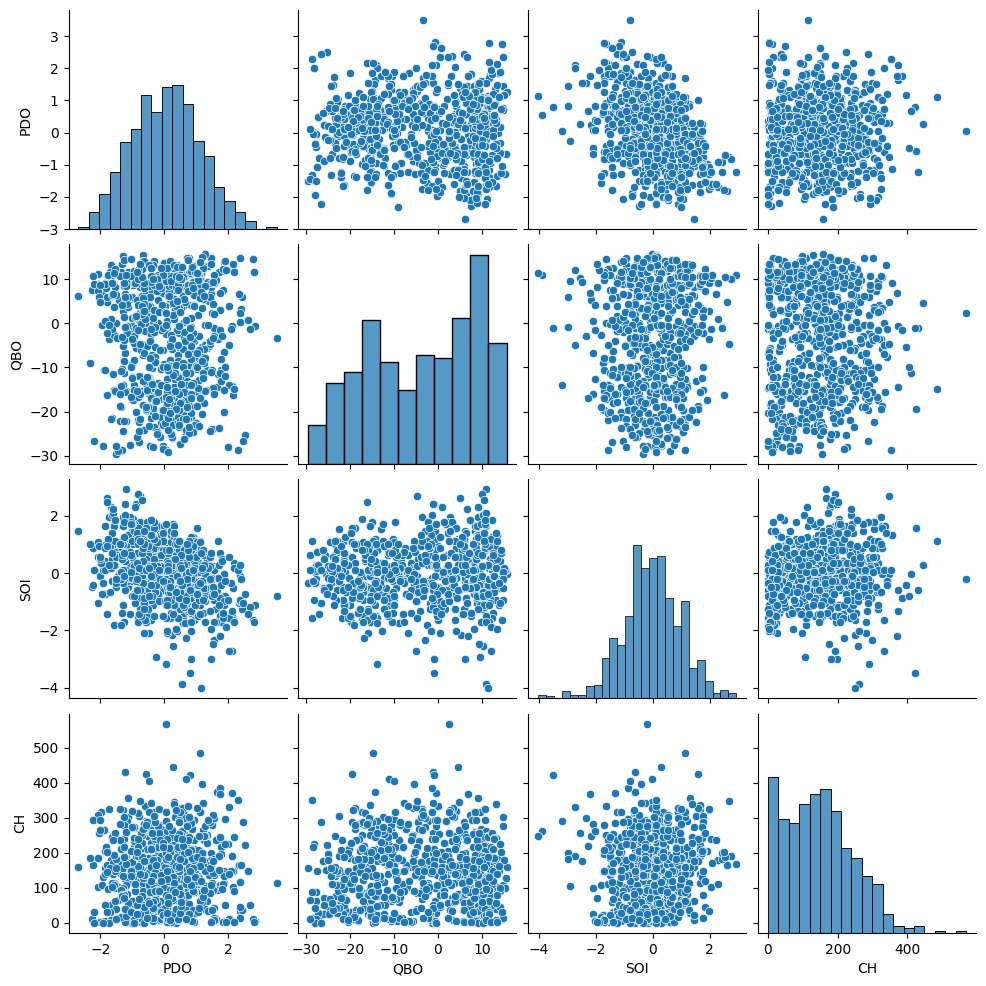

In [16]:
sns.pairplot(indeks_iklim[['PDO','QBO','SOI','CH']])

Hubungan setiap variabel cenderung acak. Meskipun demikian, dapat terlihat bahwa PDO dan SOI memiliki korelasi negatif.

## Time Plot

### Kombinasi 4

PDO, QBO, SOI, dan CH

<Axes: xlabel='Date'>

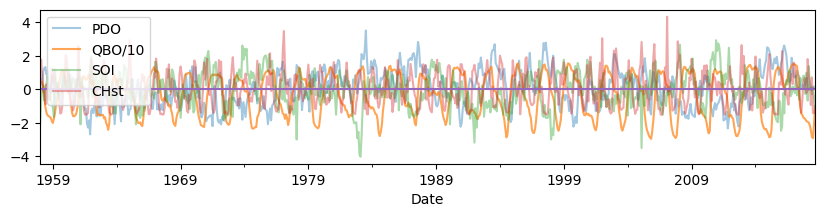

In [17]:
indeks_iklim['PDO'].plot(figsize=(10,2),legend=True, alpha=0.4)
(indeks_iklim['QBO']/10).plot(legend=True, label='QBO/10', alpha=0.7)
indeks_iklim['SOI'].plot(legend=True, alpha=0.4)
indeks_iklim['CHst'].plot(legend=True, alpha=0.4)
gt['y'].plot()

Untuk memudahkan pembacaan hasil visualisasi, kita akan melihat pada rentang tahun pendek: 2012-2015.

<Axes: xlabel='Date'>

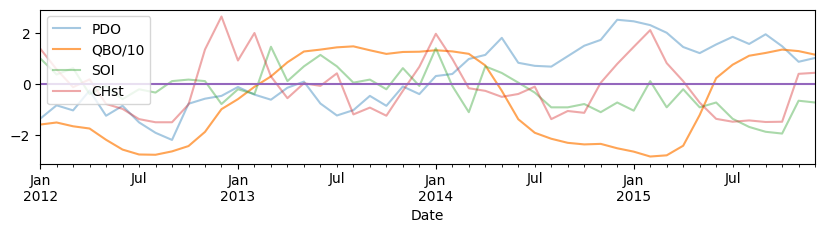

In [18]:
indeks_iklim['2012':'2015']['PDO'].plot(figsize=(10,2),legend=True, alpha=0.4)
(indeks_iklim['2012':'2015']['QBO']/10).plot(legend=True, label='QBO/10', alpha=0.7)
indeks_iklim['2012':'2015']['SOI'].plot(legend=True, alpha=0.4)
indeks_iklim['2012':'2015']['CHst'].plot(legend=True, alpha=0.4)
gt['2012':'2015']['y'].plot()

### Kombinasi 2

PDO dan CH

<Axes: xlabel='Date'>

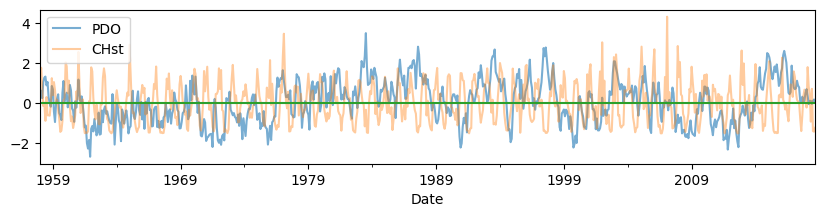

In [19]:
indeks_iklim['PDO'].plot(figsize=(10,2),legend=True, alpha=0.6)
indeks_iklim['CHst'].plot(legend=True, alpha=0.4)
gt['y'].plot()

SOI dan CH

<Axes: xlabel='Date'>

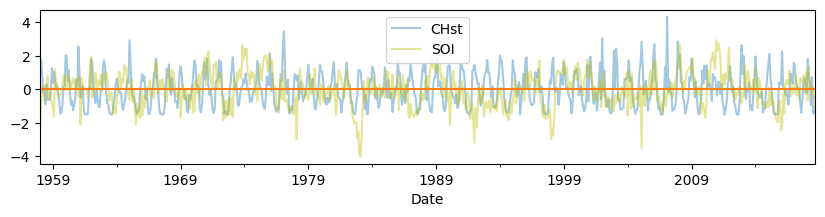

In [20]:
indeks_iklim['CHst'].plot(figsize=(10,2),legend=True, alpha=0.4)
indeks_iklim['SOI'].plot(legend=True, alpha=0.4, color='y')
gt['y'].plot()

QBO dan CH

<Axes: xlabel='Date'>

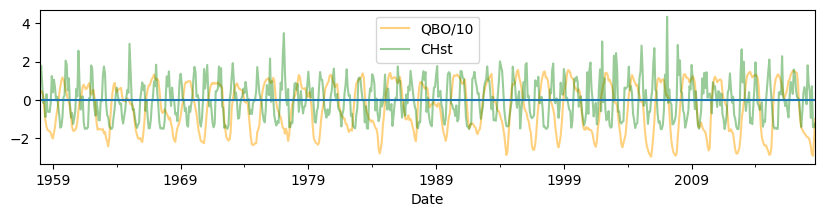

In [21]:
(indeks_iklim['QBO']/10).plot(figsize=(10,2),legend=True, label='QBO/10', alpha=0.5, color='orange')
indeks_iklim['CHst'].plot(legend=True, alpha=0.4, color='g')
gt['y'].plot()

### Kombinasi 1

PDO

<Axes: xlabel='Date'>

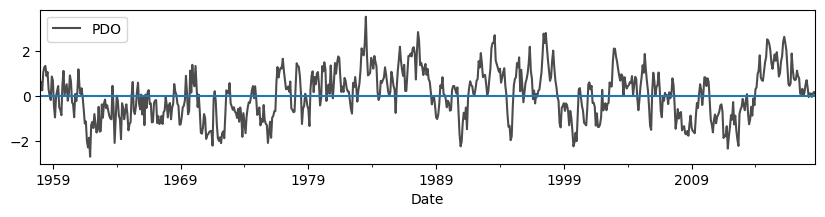

In [22]:
indeks_iklim['PDO'].plot(figsize=(10,2),legend=True,  alpha=0.7, color='k')
gt['y'].plot()

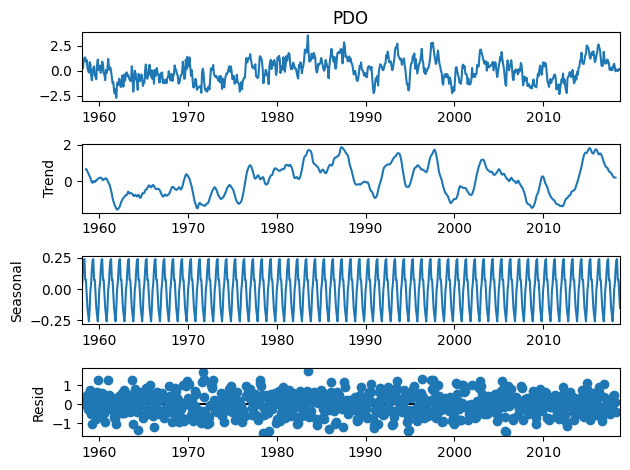

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(indeks_iklim['PDO']).plot()
plt.show()

QBO

<Axes: xlabel='Date'>

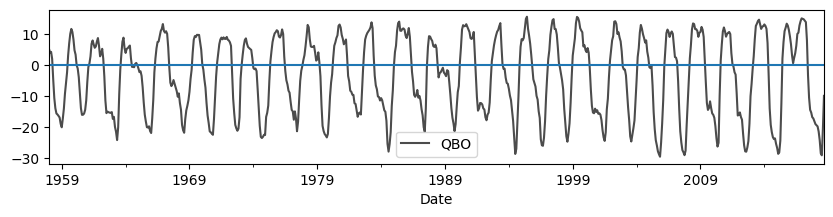

In [24]:
indeks_iklim['QBO'].plot(figsize=(10,2),legend=True, alpha=0.7, color='k')
gt['y'].plot()

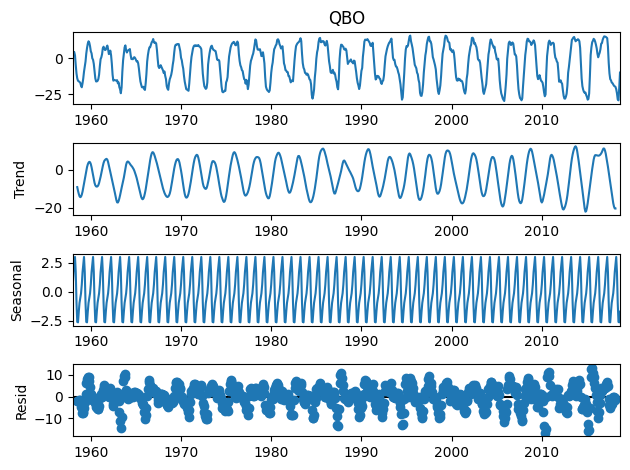

In [25]:
seasonal_decompose(indeks_iklim['QBO']).plot()
plt.show()

SOI

<Axes: xlabel='Date'>

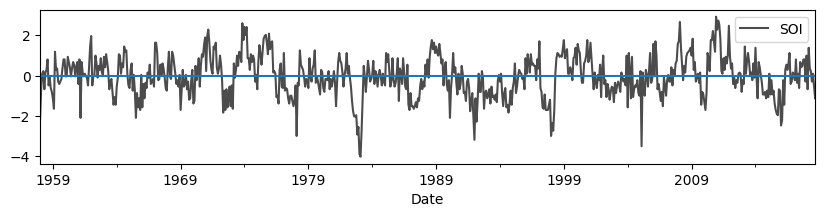

In [26]:
indeks_iklim['SOI'].plot(figsize=(10,2),legend=True,  alpha=0.7, color='k')
gt['y'].plot()

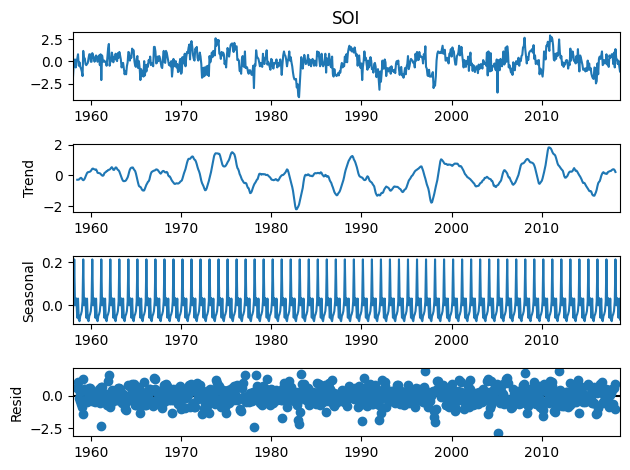

In [27]:
seasonal_decompose(indeks_iklim['SOI']).plot()
plt.show()

CH

<Axes: xlabel='Date'>

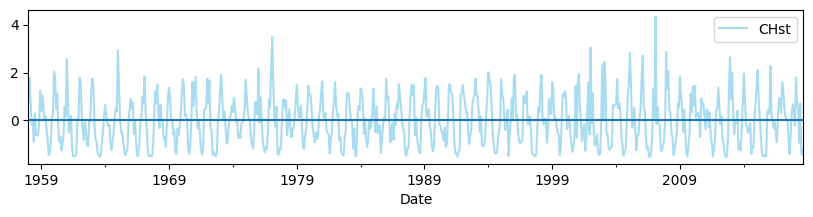

In [28]:
indeks_iklim['CHst'].plot(figsize=(10,2),legend=True,  alpha=0.7, color='skyblue')
gt['y'].plot()

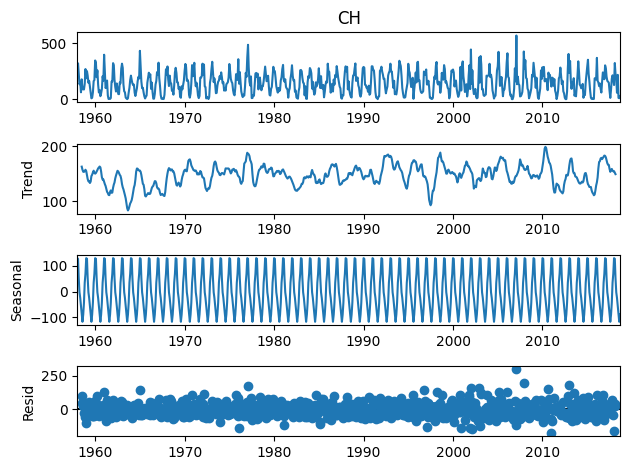

In [29]:
seasonal_decompose(indeks_iklim['CH']).plot()
plt.show()

## ACF dan PACF Plot

PDO

C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


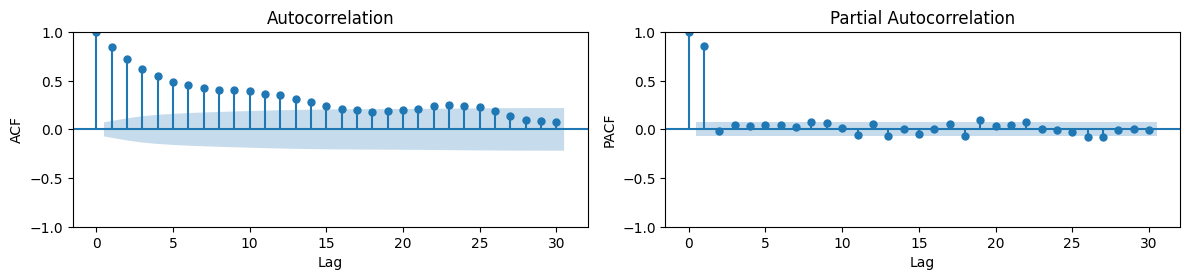

In [30]:
import statsmodels.api as sm 
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_acf(indeks_iklim['PDO'], lags=30, ax=ax1)
plt.xlabel('Lag')
plt.ylabel('ACF') # for MA

ax2 = fig.add_subplot(222)
fig = sm.graphics.tsa.plot_pacf(indeks_iklim['PDO'], lags=30, ax=ax2)
plt.xlabel('Lag')
plt.ylabel('PACF') # for AR

plt.tight_layout()
plt.show()

QBO

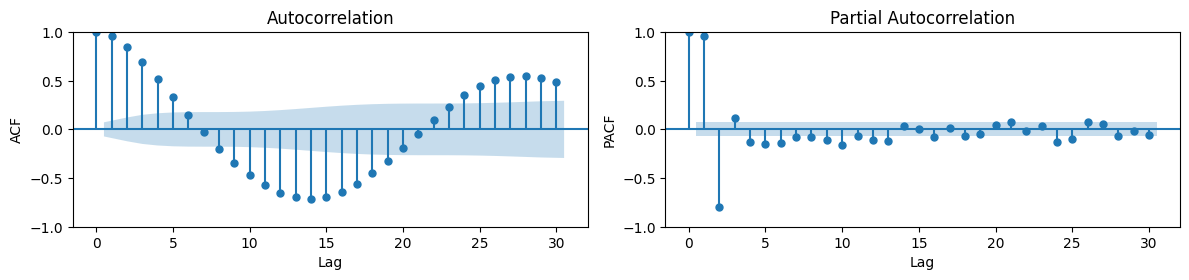

In [ ]:
import statsmodels.api as sm 
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_acf(indeks_iklim['QBO'], lags=30, ax=ax1)
plt.xlabel('Lag')
plt.ylabel('ACF') # for MA

ax2 = fig.add_subplot(222)
fig = sm.graphics.tsa.plot_pacf(indeks_iklim['QBO'], lags=30, ax=ax2)
plt.xlabel('Lag')
plt.ylabel('PACF') # for AR

plt.tight_layout()
plt.show()

SOI

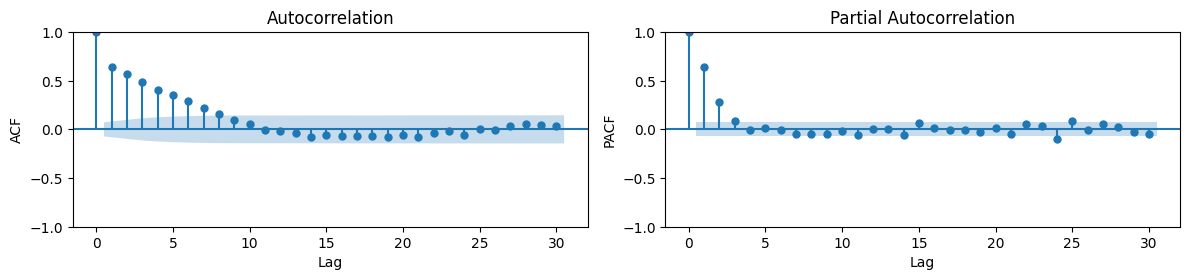

In [ ]:
import statsmodels.api as sm 
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_acf(indeks_iklim['SOI'], lags=30, ax=ax1)
plt.xlabel('Lag')
plt.ylabel('ACF') # for MA

ax2 = fig.add_subplot(222)
fig = sm.graphics.tsa.plot_pacf(indeks_iklim['SOI'], lags=30, ax=ax2)
plt.xlabel('Lag')
plt.ylabel('PACF') # for AR

plt.tight_layout()
plt.show()

CH

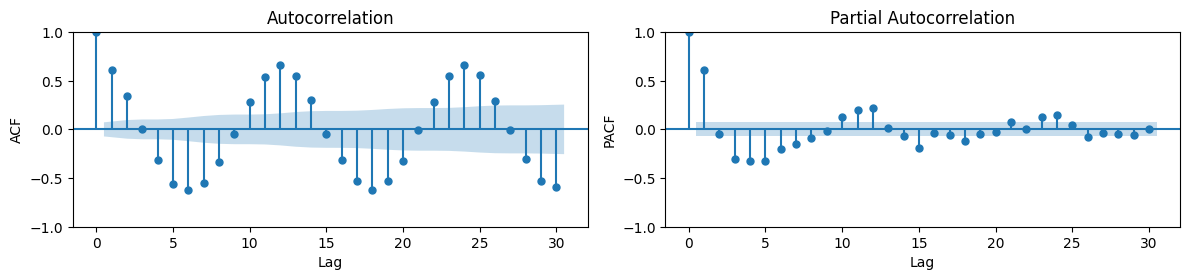

In [ ]:
import statsmodels.api as sm 
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_acf(indeks_iklim['CHst'], lags=30, ax=ax1)
plt.xlabel('Lag')
plt.ylabel('ACF') # for MA

ax2 = fig.add_subplot(222)
fig = sm.graphics.tsa.plot_pacf(indeks_iklim['CHst'], lags=30, ax=ax2)
plt.xlabel('Lag')
plt.ylabel('PACF') # for AR

plt.tight_layout()
plt.show()

# Modelling and Forecasting Model

In [35]:
from statsmodels.tsa.api import VAR, VARMAX, SARIMAX
from statsmodels.tsa.api import acf, pacf, ccf, graphics, adfuller, coint
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import TimeSeriesSplit

import statsmodels.api as sm
import statsmodels.graphics.tsaplots as smg 
from statsmodels.graphics.tsaplots import plot_predict

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error as mse

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

Splitting Data

Data akan dibagi jadi 2: 80% data digunakan sebagai data training dan sisanya digunakan sebagai data testing.

In [36]:
# set testing test
indeks_iklim = indeks_iklim[['PDO','QBO','SOI','CH']]
nobs_test = int(len(indeks_iklim)*0.2)

# split data
train = indeks_iklim[:-nobs_test].copy()
test = indeks_iklim[-nobs_test:].copy()

print(f'train: {train.shape}, test: {test.shape}')


train: (584, 4), test: (145, 4)


### Modelling and Forecasting the Result

#### VAR

In [37]:
# define columns
variabelx = ['PDO','QBO', 'SOI','CH']

# build model
model = VAR(indeks_iklim[variabelx])

# In VAR, use select_order to select the best model
seor = model.select_order()
seor.summary()

C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.table.SimpleTable'>

Berdasarkan 4 evaluasi, model signifikan akan diperoleh jika digunakan lag 5 (BIC), lag 6 (HQIC), atau lag 13 (AIC dan FPE). Kita akan pilih lag 13

In [38]:
varmodel = model.fit(maxlags=13)
varmodel.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 06, Jan, 2024
Time:                     11:51:42
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    9.42010
Nobs:                     716.000    HQIC:                   8.58882
Log likelihood:          -6739.43    FPE:                    3187.43
AIC:                      8.06589    Det(Omega_mle):         2395.45
--------------------------------------------------------------------
Results for equation PDO
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const          -0.069681         0.195114           -0.357           0.721
L1.PDO          0.817381         0.038839           21.045           0.000
L1.QBO          0.006148         0.009971            0.617           0.538
L1.SOI     

Forecast

In [39]:
# Membuat forecast input
forecast_input = train[variabelx].values[-nobs_test:]
fc_res6 = varmodel.forecast(y = forecast_input, steps=nobs_test)
dfvar = pd.DataFrame(fc_res6,
                        index=test.index,
                        columns=variabelx)
dfvar

PDO        QBO       SOI          CH
DATE                                                 
2006-09-01 -0.460986   8.684820 -0.862289   19.001542
2006-10-01 -0.169076   9.334673 -0.970888   41.376747
2006-11-01 -0.062350   9.997645 -0.738322  134.909387
2006-12-01  0.089564  10.718687 -0.603980  220.046149
2007-01-01  0.409804   9.983734 -0.556046  262.265487
...              ...        ...       ...         ...
2018-05-01  0.074012  -0.759328 -0.020672  151.931927
2018-06-01  0.070007  -1.029335 -0.021649  136.209853
2018-07-01  0.053313  -1.440559 -0.026646  123.396684
2018-08-01  0.029241  -1.892117 -0.033439  116.836699
2018-09-01  0.005032  -2.296576 -0.039356  118.175448

[145 rows x 4 columns]

Plot Hasil

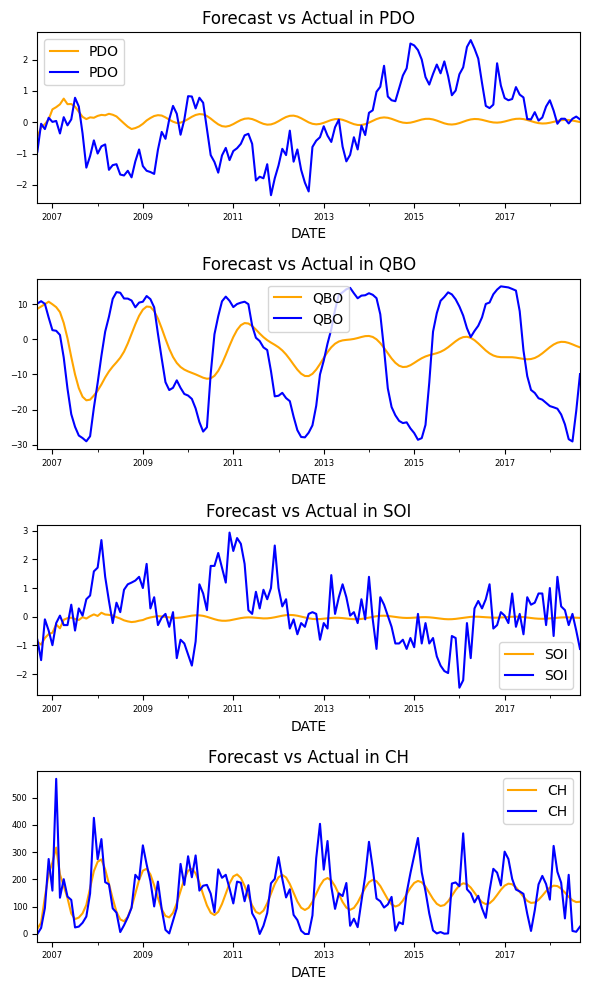

In [40]:
fig, axes = plt.subplots(len(variabelx),1,figsize=(6,10))

for i, (col,ax) in enumerate(zip(variabelx, axes.flatten())):
    #angka = int(f'22{i}')
    #ax = fig.add_subplot(angka)
    dfvar[col].plot(legend=True, ax=ax,
                       color='orange').autoscale(axis='x',
                                                 tight=True)
    
    test[col][-nobs_test:].plot(legend=True, ax=ax,
                                color='b')
    
    ax.set_title('Forecast vs Actual in ' + col)
    ax.tick_params(labelsize=6)

plt.tight_layout()

#### VARMAX

In [41]:
trainv = train.copy()
trainv['QBO'] = np.exp(trainv['QBO'])
trainv['SOI'] = np.exp(trainv['SOI'])
trainv['PDO'] = np.exp(trainv['PDO'])
trainv = trainv.dropna()
trainv

PDO           QBO       SOI     CH
DATE                                               
1958-01-01  1.284025    190.566268  0.116484  249.0
1958-02-01  1.858928     60.340288  0.511709  320.0
1958-03-01  1.284025     71.521636  1.105171  230.0
1958-04-01  2.886371      7.242743  1.258600  133.0
1958-05-01  3.596640      0.009005  0.511709  150.0
...              ...           ...       ...    ...
2006-04-01  1.491825    148.413159  2.718282  189.0
2006-05-01  1.616074  31571.181323  0.511709   82.0
2006-06-01  2.829217  95798.279068  0.663650   32.0
2006-07-01  1.419068  46630.028454  0.449329   40.0
2006-08-01  0.522046   8955.292703  0.286505    0.0

[584 rows x 4 columns]

In [42]:
testv = test.copy()
testv['QBO'] = np.exp(testv['QBO'])
testv['SOI'] = np.exp(testv['SOI'])
testv['PDO'] = np.exp(testv['PDO'])
testv = testv.dropna()
testv.head()

PDO           QBO       SOI     CH
DATE                                               
2006-09-01  0.390628  26903.186074  0.449329    0.0
2006-10-01  0.951229  52052.078188  0.220910   22.0
2006-11-01  0.802519  24343.009424  0.913931   95.0
2006-12-01  1.150274    497.701251  0.618783  275.0
2007-01-01  1.010050     13.599051  0.371577  159.0

##### ACF dan PACF

C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


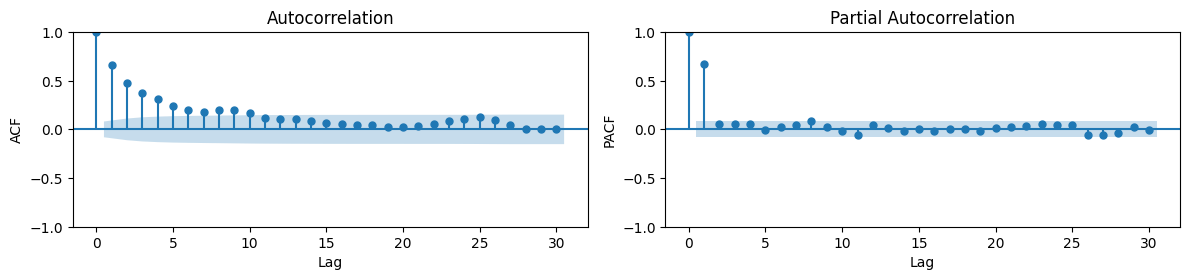

In [43]:
import statsmodels.api as sm 
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_acf(trainv['PDO'], lags=30, ax=ax1)
plt.xlabel('Lag')
plt.ylabel('ACF') # for MA

ax2 = fig.add_subplot(222)
fig = sm.graphics.tsa.plot_pacf(trainv['PDO'], lags=30, ax=ax2)
plt.xlabel('Lag')
plt.ylabel('PACF') # for AR

plt.tight_layout()
plt.show()

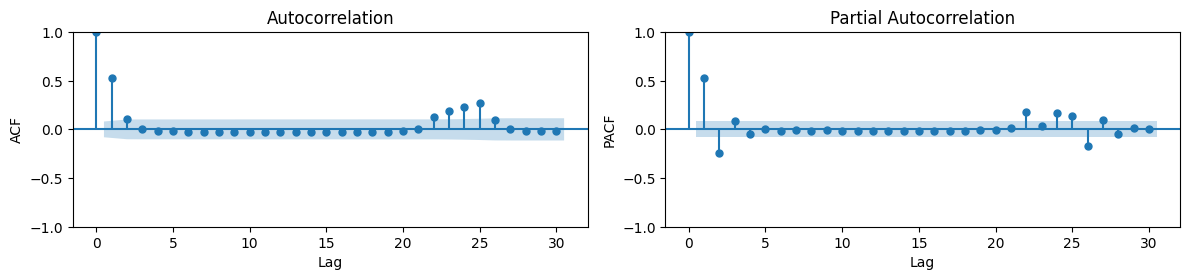

In [44]:
import statsmodels.api as sm 
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_acf(trainv['QBO'], lags=30, ax=ax1)
plt.xlabel('Lag')
plt.ylabel('ACF') # for MA

ax2 = fig.add_subplot(222)
fig = sm.graphics.tsa.plot_pacf(trainv['QBO'], lags=30, ax=ax2)
plt.xlabel('Lag')
plt.ylabel('PACF') # for AR

plt.tight_layout()
plt.show()

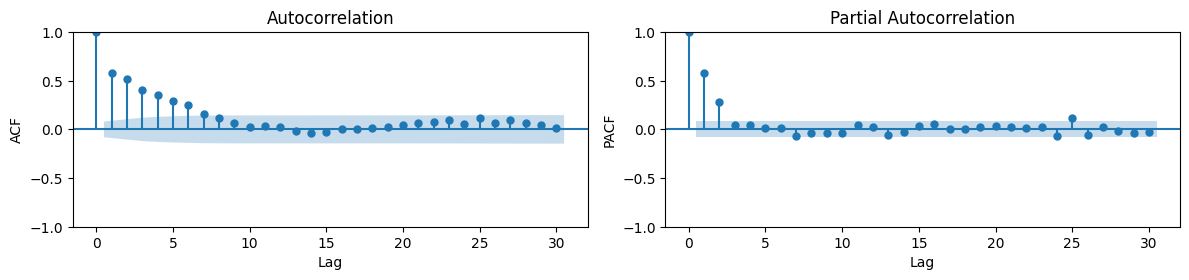

In [45]:
import statsmodels.api as sm 
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_acf(trainv['SOI'], lags=30, ax=ax1)
plt.xlabel('Lag')
plt.ylabel('ACF') # for MA

ax2 = fig.add_subplot(222)
fig = sm.graphics.tsa.plot_pacf(trainv['SOI'], lags=30, ax=ax2)
plt.xlabel('Lag')
plt.ylabel('PACF') # for AR

plt.tight_layout()
plt.show()

##### Modelling

In [46]:
varmamodel51 = VARMAX(trainv, order=(5,1)).fit(disp=False)
varmamodel51.summary()

C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                Statespace Model Results                               
=======================================================================================
Dep. Variable:     ['PDO', 'QBO', 'SOI', 'CH']   No. Observations:                  584
Model:                              VARMA(5,1)   Log Likelihood              -13669.826
                                   + intercept   AIC                          27559.652
Date:                         Sat, 06 Jan 2024   BIC                          28040.341
Time:                                 11:54:12   HQIC                         27747.001
Sample:                             01-01-1958                                         
                                  - 08-01-2006                                         
Covariance Type:                           opg                                         
==========================================================================================================
Ljung-Box (L1) (Q):      0.00, 0.00, 0.00, 0.02   Jarque-Bera (JB):   119680.13, 278392.89, 5691.27, 47.37
Prob(Q):                 1.00, 0.99, 0.99, 0.89   Prob(JB):                         0.00, 0.00, 0.00, 0.00
Heteroskedasticity (H): 6.18, 76.69, 0.41, 1.20   Skew:                             4.76, 7.20, 2.23, 0.58
Prob(H) (two-sided):     0.00, 0.00, 0.00, 0.21   Kurtosis:                     72.48, 108.99, 17.63, 3.77
                           Results for equation PDO                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6113      1.958      0.312      0.755      -3.226       4.449
L1.PDO         0.6092      0.935      0.652      0.515      -1.223       2.441
L1.QBO      6.226e-07    2.5e-05      0.025      0.980   -4.85e-05    4.97e-05
L1.SOI        -0.0743      1.058     -0.070      0.944      -2.148       2.000
L1.CH         -0.0009      0.012     -0.073      0.942      -0.024       0.023
L2.PDO        -0.0177      0.647     -0.027      0.978      -1.285       1.250
L2.QBO     -4.789e-07   1.66e-05     -0.029      0.977    -3.3e-05    3.21e-05
L2.SOI        -0.0140      0.387     -0.036      0.971      -0.772       0.744
L2.CH          0.0023      0.009      0.269      0.788      -0.015       0.019
L3.PDO         0.0480      0.579      0.083      0.934      -1.087       1.183
L3.QBO      5.882e-07   7.76e-06      0.076      0.940   -1.46e-05    1.58e-05
L3.SOI        -0.0714      0.284     -0.251      0.802      -0.629       0.486
L3.CH       7.102e-05      0.003      0.021      0.983      -0.007       0.007
L4.PDO         0.0518      0.199      0.261      0.794      -0.338       0.442
L4.QBO     -5.048e-07   3.35e-06     -0.151      0.880   -7.06e-06    6.05e-06
L4.SOI         0.0022      0.139      0.016      0.987      -0.270       0.274
L4.CH       3.562e-05      0.005      0.008      0.994      -0.009       0.009
L5.PDO        -0.0073      0.200     -0.036      0.971      -0.400       0.386
L5.QBO     -1.074e-08   1.44e-06     -0.007      0.994   -2.83e-06    2.81e-06
L5.SOI        -0.0643      0.441     -0.146      0.884      -0.928       0.799
L5.CH       7.818e-05      0.009      0.009      0.993      -0.018       0.018
L1.e(PDO)      0.0016      0.936      0.002      0.999      -1.833       1.836
L1.e(QBO)  -3.182e-08   2.51e-05     -0.001      0.999   -4.91e-05    4.91e-05
L1.e(SOI)     -0.0004      1.064     -0.000      1.000      -2.086       2.085
L1.e(CH)    2.612e-05      0.012      0.002      0.998      -0.024       0.024
                           Results for equation QBO                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
---------

##### Forecast

In [47]:
# Membuat forecast input
forecast_input_varma = trainv[variabelx].values[-nobs_test:]
fc_varma = varmamodel51.forecast(y = forecast_input_varma, steps=nobs_test)
df_varma = pd.DataFrame(fc_varma,
                        index=test.index,
                        columns=variabelx)
df_varma.head(3)

PDO           QBO       SOI          CH
DATE                                                    
2006-09-01  0.999626  -1093.872083  0.693910   69.472791
2006-10-01  1.218319  -3717.319533  0.864254  137.067970
2006-11-01  1.301806 -20458.129701  1.076412  187.618717

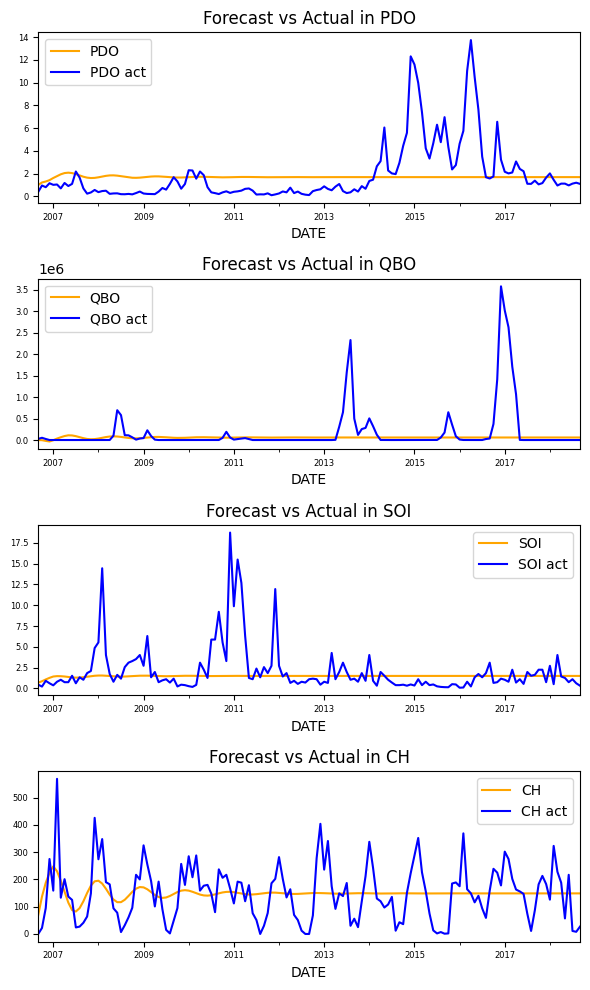

In [48]:
fig, axes = plt.subplots(len(variabelx),1,figsize=(6,10))

for i, (col,ax) in enumerate(zip(variabelx, axes.flatten())):
    #angka = int(f'22{i}')
    #ax = fig.add_subplot(angka)
    df_varma[col].plot(legend=True, ax=ax,
                       color='orange').autoscale(axis='x',
                                                 tight=True)
    
    testv[col][-nobs_test:].plot(legend=True, ax=ax,
                                color='b', label=f'{col} act')
    
    ax.set_title('Forecast vs Actual in ' + col)
    ax.tick_params(labelsize=6)

plt.tight_layout()

#### SARIMA without EXOG Variables

In [49]:
sarimamodelwx = SARIMAX(endog= train['CH'], # y
                        order=(4,1,1), 
                        seasonal_order=(2,2,4,12),
                        enforce_stationarity=False,
                        enforce_invertibility=False).fit()
sarimamodelwx.summary()

C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                           SARIMAX Results                                           
=====================================================================================================
Dep. Variable:                                            CH   No. Observations:                  584
Model:             SARIMAX(4, 1, 1)x(2, 2, [1, 2, 3, 4], 12)   Log Likelihood               -2781.767
Date:                                       Sat, 06 Jan 2024   AIC                           5587.534
Time:                                               11:55:52   BIC                           5638.323
Sample:                                           01-01-1958   HQIC                          5607.448
                                                - 08-01-2006                                         
Covariance Type:                                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1298      0.040      3.259      0.001       0.052       0.208
ar.L2          0.0447      0.045      0.992      0.321      -0.044       0.133
ar.L3          0.1094      0.046      2.396      0.017       0.020       0.199
ar.L4         -0.0570      0.041     -1.385      0.166      -0.138       0.024
ma.L1         -1.0054      0.042    -24.010      0.000      -1.087      -0.923
ar.S.L12      -1.5237      0.113    -13.430      0.000      -1.746      -1.301
ar.S.L24      -0.6255      0.107     -5.838      0.000      -0.836      -0.416
ma.S.L12      -0.6129      0.137     -4.470      0.000      -0.882      -0.344
ma.S.L24      -1.4330      0.151     -9.466      0.000      -1.730      -1.136
ma.S.L36       0.4319      0.133      3.256      0.001       0.172       0.692
ma.S.L48       0.6556      0.129      5.078      0.000       0.403       0.909
sigma2      2343.0279    201.096     11.651      0.000    1948.888    2737.168
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                15.03
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.48   Skew:                             0.29
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

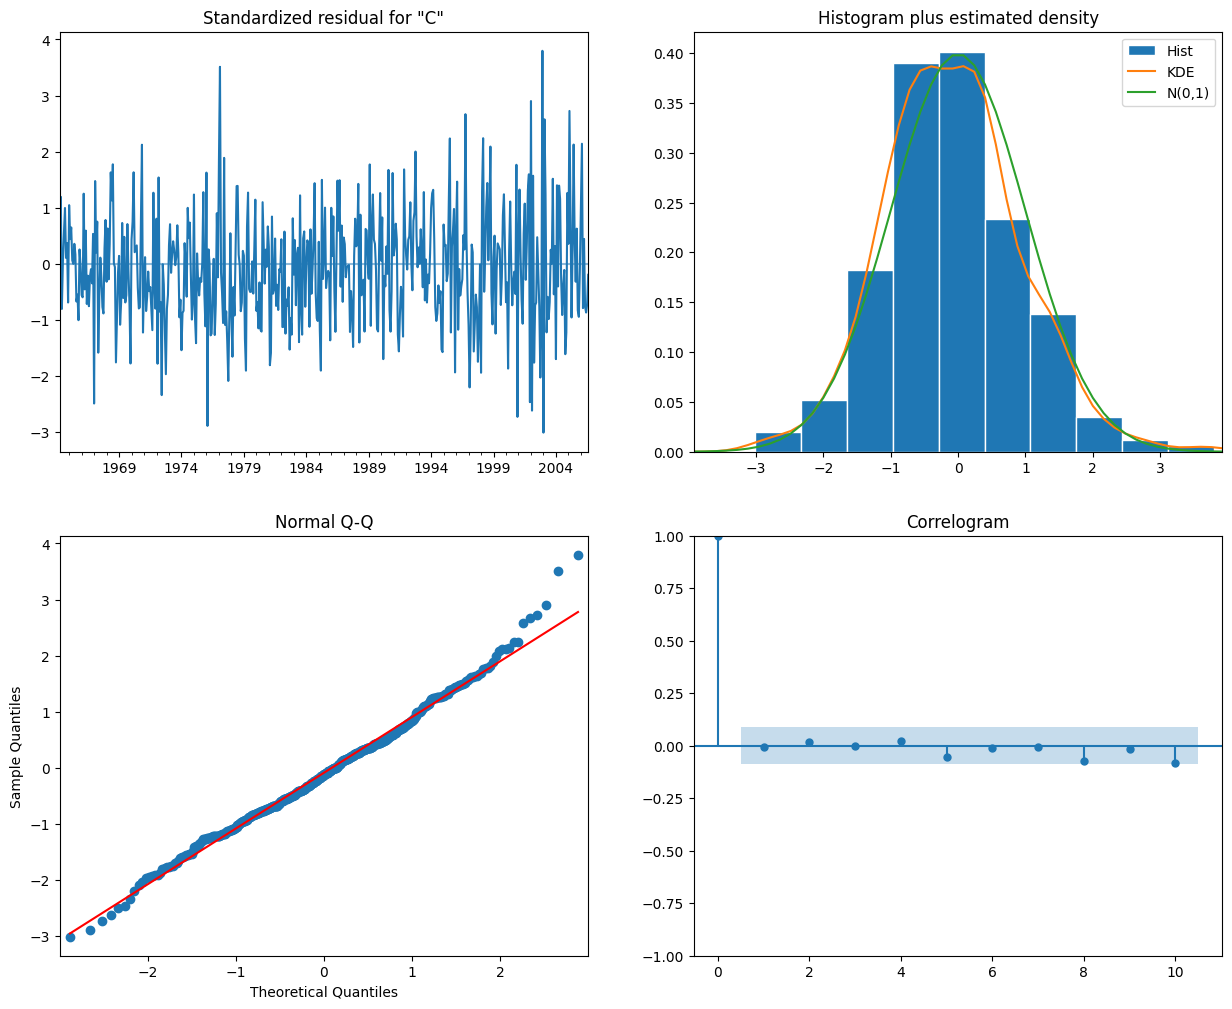

In [50]:
sarimamodelwx.plot_diagnostics(figsize=(15,12))
plt.show()

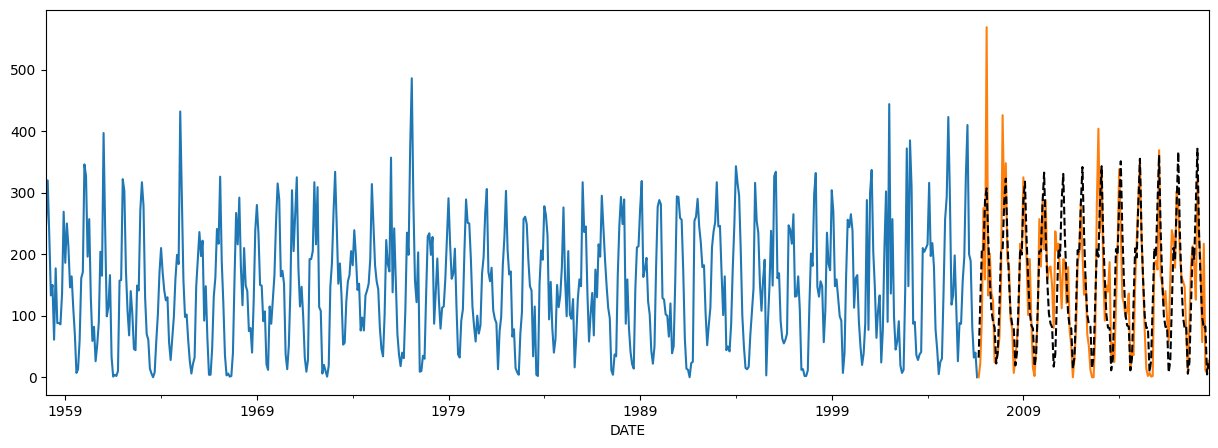

In [51]:
fig, ax = plt.subplots(figsize = (15, 5))

train['CH'].plot(ax=ax)
test['CH'].plot(ax=ax)

fcastwx = sarimamodelwx.get_forecast(steps=len(test)).summary_frame()
fcastwx['mean'].plot(ax=ax, style='k--')

plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_25896\187758988.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  test[year]['CH'].plot(ax=ax)
C:\Users\ACER\AppData\Local\Temp\ipykernel_25896\187758988.py:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  fcastwx11[year]['mean'].plot(ax=ax, style='k--')


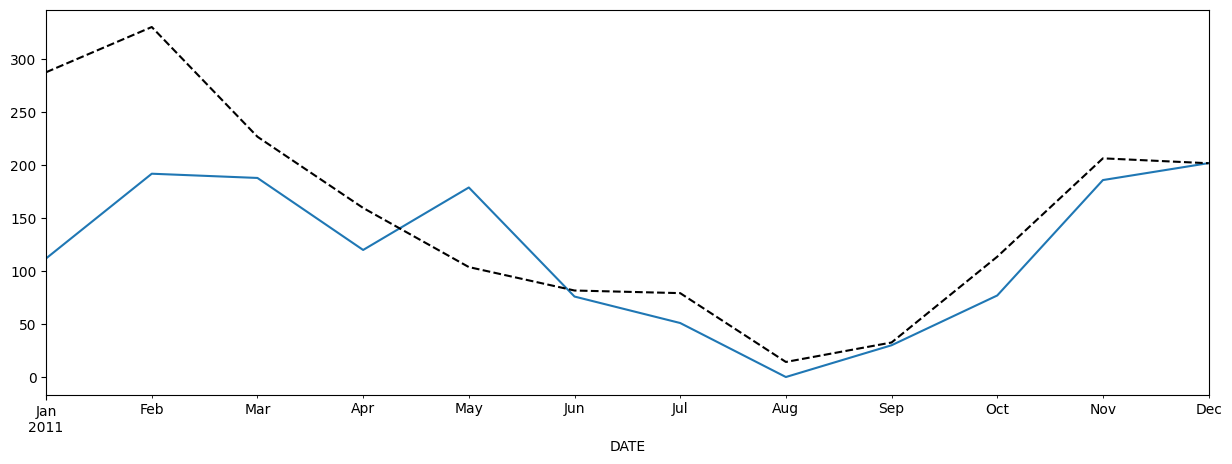

In [52]:
fig, ax = plt.subplots(figsize = (15, 5))

year = '2011'
#train[year]['CH'].plot(ax=ax)
test[year]['CH'].plot(ax=ax)

fcastwx11 = sarimamodelwx.get_forecast(steps=len(test)).summary_frame()
fcastwx11[year]['mean'].plot(ax=ax, style='k--')

plt.show()

#### SARIMA with EXOG Variables

In [53]:
variabelxsarima = ['PDO', 'QBO', 'SOI']

In [54]:
sarimamodel = SARIMAX(endog= train['CH'], # y
                        exog= train[variabelxsarima], #predictors
                        order=(3,1,1), 
                        seasonal_order=(3,1,4,24),
                        enforce_stationarity=False,
                        enforce_invertibility=False).fit()
sarimamodel.summary()

C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                           SARIMAX Results                                           
=====================================================================================================
Dep. Variable:                                            CH   No. Observations:                  584
Model:             SARIMAX(3, 1, 1)x(3, 1, [1, 2, 3, 4], 24)   Log Likelihood               -2494.765
Date:                                       Sat, 06 Jan 2024   AIC                           5019.531
Time:                                               12:07:10   BIC                           5081.532
Sample:                                           01-01-1958   HQIC                          5043.943
                                                - 08-01-2006                                         
Covariance Type:                                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
PDO           11.3467      3.025      3.751      0.000       5.418      17.275
QBO           -0.4293      0.289     -1.485      0.138      -0.996       0.137
SOI            6.1058      2.696      2.265      0.024       0.822      11.389
ar.L1          0.1401      0.045      3.143      0.002       0.053       0.227
ar.L2          0.0261      0.044      0.590      0.555      -0.061       0.113
ar.L3          0.0942      0.044      2.147      0.032       0.008       0.180
ma.L1         -1.0006      0.208     -4.812      0.000      -1.408      -0.593
ar.S.L24      -1.2974      0.198     -6.553      0.000      -1.685      -0.909
ar.S.L48      -0.9179      0.253     -3.632      0.000      -1.413      -0.423
ar.S.L72      -0.2832      0.143     -1.985      0.047      -0.563      -0.004
ma.S.L24       0.2852      0.265      1.077      0.282      -0.234       0.805
ma.S.L48      -0.3425      0.275     -1.244      0.214      -0.882       0.197
ma.S.L72      -0.5835      0.240     -2.432      0.015      -1.054      -0.113
ma.S.L96      -0.4244      0.157     -2.699      0.007      -0.732      -0.116
sigma2      2560.2813    809.580      3.162      0.002     973.534    4147.028
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                13.02
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               1.78   Skew:                             0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

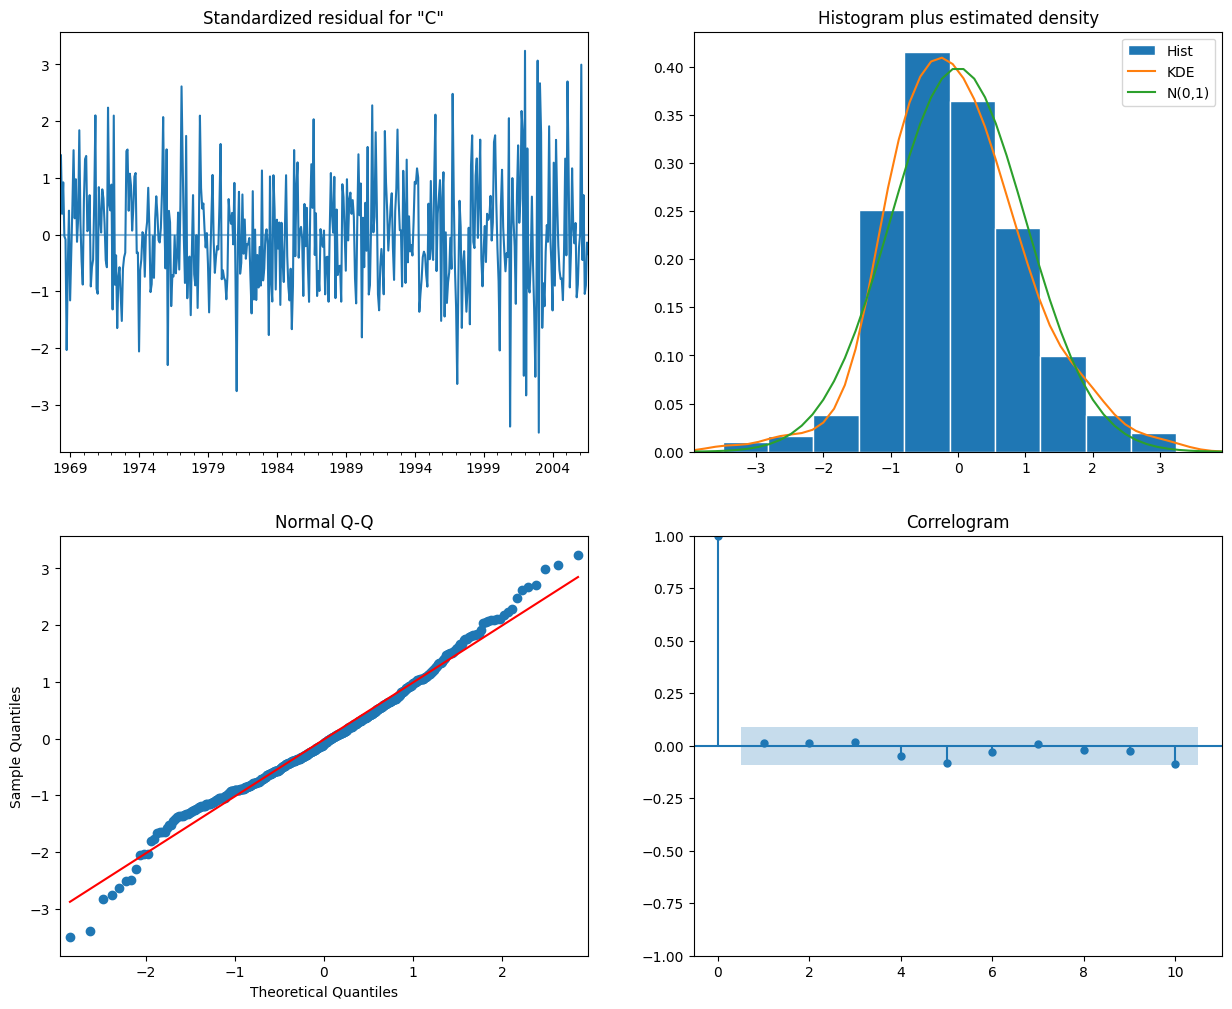

In [55]:
sarimamodel.plot_diagnostics(figsize=(15,12))
plt.show()

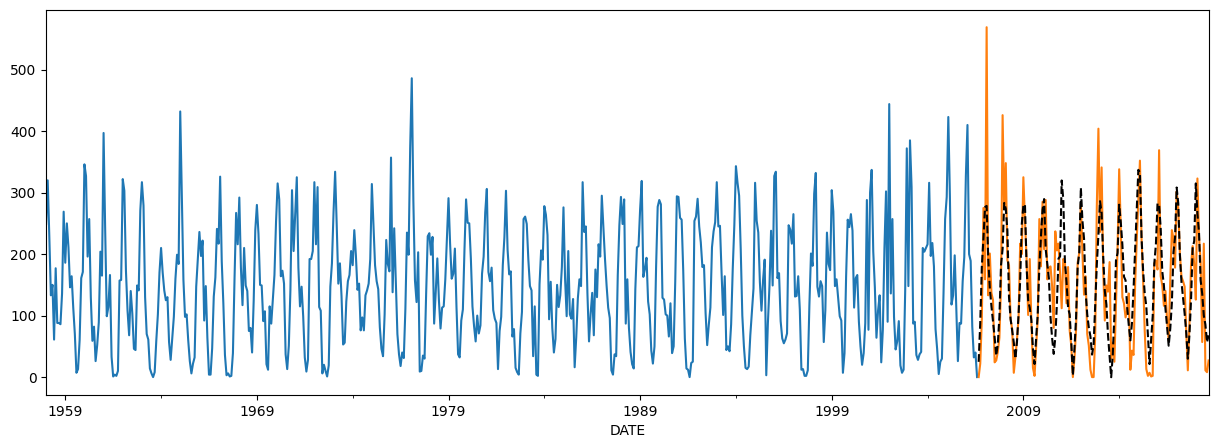

In [56]:
fig, ax = plt.subplots(figsize = (15, 5))

train['CH'].plot(ax=ax)
test['CH'].plot(ax=ax)

fcast = sarimamodel.get_forecast(steps=len(test), exog=test[variabelxsarima]).summary_frame()
fcast['mean'].plot(ax=ax, style='k--')

plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_25896\2510652875.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  test[year]['CH'].plot(ax=ax)
C:\Users\ACER\AppData\Local\Temp\ipykernel_25896\2510652875.py:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  fcast[year]['mean'].plot(ax=ax, style='k--')


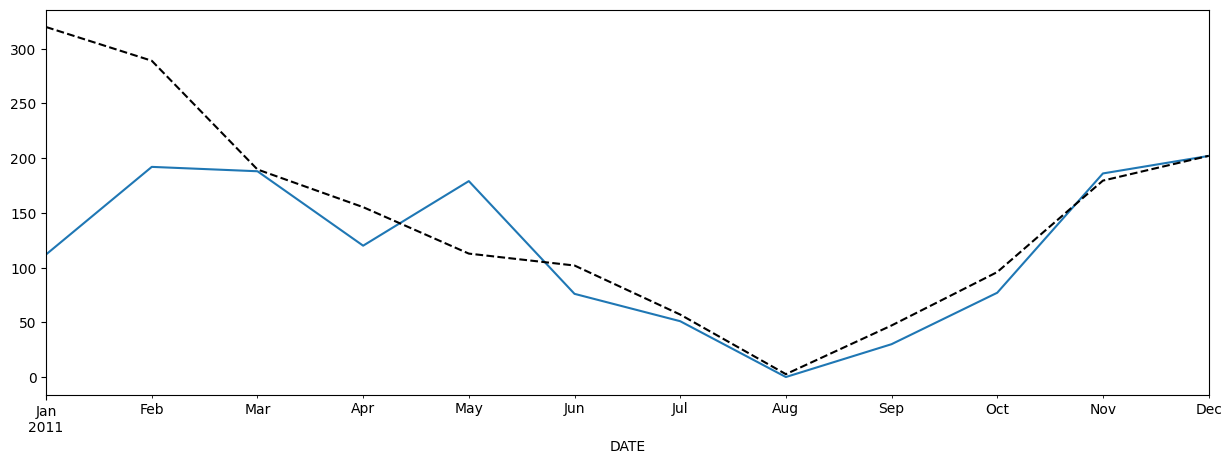

In [57]:
fig, ax = plt.subplots(figsize = (15, 5))

year = '2011'
#train[year]['CH'].plot(ax=ax)
test[year]['CH'].plot(ax=ax)

fcast = sarimamodel.get_forecast(steps=len(test), exog=test[variabelxsarima]).summary_frame()
fcast[year]['mean'].plot(ax=ax, style='k--')

plt.show()

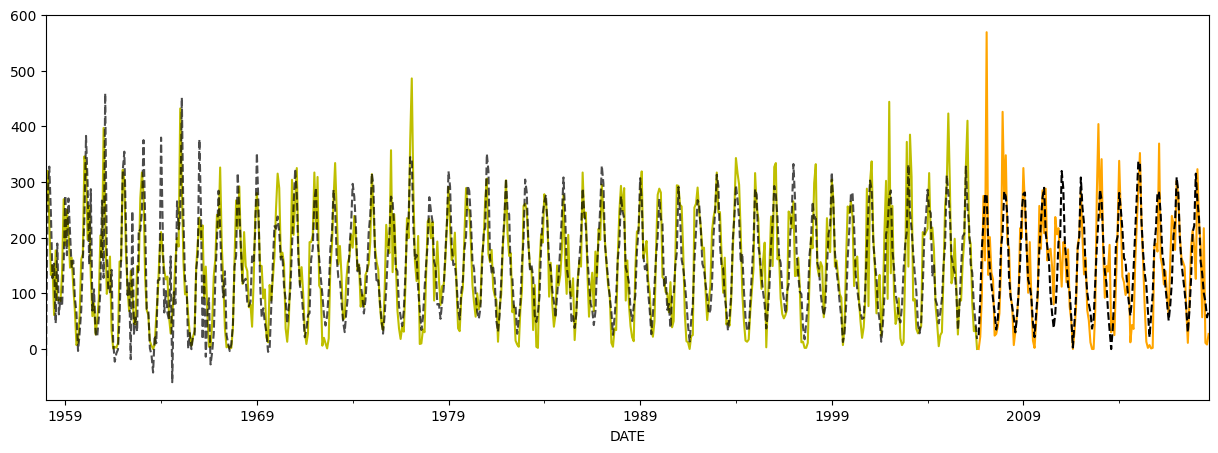

In [58]:
fig, ax = plt.subplots(figsize = (15, 5))

train['CH'].plot(ax=ax, color='y')
test['CH'].plot(ax=ax, color='orange')
sarimamodel.fittedvalues.plot(ax=ax,style='k--', alpha=0.7)

fcastsarimaexog = sarimamodel.get_forecast(steps=len(test), exog=test[variabelxsarima]).summary_frame()
fcastsarimaexog['mean'].plot(ax=ax, style='k--')

plt.show()

#### Prophet Model

In [59]:
import prophet as Prophet

In [60]:
traindf = train['CH']
testdf = test['CH']

In [61]:
traindf = traindf.reset_index('DATE')
testdf = testdf.reset_index('DATE')
traindf.head(5)


DATE     CH
0 1958-01-01  249.0
1 1958-02-01  320.0
2 1958-03-01  230.0
3 1958-04-01  133.0
4 1958-05-01  150.0

In [62]:
traindf = traindf.rename(columns={'DATE':'ds', 'CH':'y'})
traindf.head()

ds      y
0 1958-01-01  249.0
1 1958-02-01  320.0
2 1958-03-01  230.0
3 1958-04-01  133.0
4 1958-05-01  150.0

In [63]:
modelprophet = Prophet.Prophet(changepoint_prior_scale=0.5, n_changepoints=30)
modelprophet.fit(traindf)

12:07:25 - cmdstanpy - INFO - Chain [1] start processing
12:07:25 - cmdstanpy - INFO - Chain [1] done processing


In [64]:
future = pd.DataFrame()
future['ds'] = testdf['DATE']
forecastpro = modelprophet.predict(future)
forecastpro

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2006-09-01  147.413583   -6.921878  122.217261   147.413583   147.413583   
1   2006-10-01  147.422997   47.447618  184.239324   147.422997   147.422997   
2   2006-11-01  147.432726  123.184794  246.712879   147.432726   147.432726   
3   2006-12-01  147.442141  161.890012  290.041886   147.442141   147.442141   
4   2007-01-01  147.451869  220.364516  355.618111   147.444634   147.465558   
..         ...         ...         ...         ...          ...          ...   
140 2018-05-01  148.750466   66.148206  195.363906   134.713501   163.325279   
141 2018-06-01  148.760195   30.673741  163.687804   134.528270   163.435403   
142 2018-07-01  148.769609    3.215694  138.940321   134.291476   163.536647   
143 2018-08-01  148.779338  -32.047400  104.729864   134.100120   163.648706   
144 2018-09-01  148.789066   -6.243111  129.186502   133.936078   163.783335   

     additive_terms  additive_terms_lower  additive_terms_upper      yearly  \
0        -86.278623            -86.278623            -86.278623  -86.278623   
1        -31.866016            -31.866016            -31.866016  -31.866016   
2         39.301266             39.301266             39.301266   39.301266   
3         75.971730             75.971730             75.971730   75.971730   
4        140.666172            140.666172            140.666172  140.666172   
..              ...                   ...                   ...         ...   
140      -20.676957            -20.676957            -20.676957  -20.676957   
141      -51.330790            -51.330790            -51.330790  -51.330790   
142      -75.209347            -75.209347            -75.209347  -75.209347   
143     -112.250694           -112.250694           -112.250694 -112.250694   
144      -86.278623            -86.278623            -86.278623  -86.278623   

     yearly_lower  yearly_upper  multiplicative_terms  \
0      -86.278623    -86.278623                   0.0   
1      -31.866016    -31.866016                   0.0   
2       39.301266     39.301266                   0.0   
3       75.971730     75.971730                   0.0   
4      140.666172    140.666172                   0.0   
..            ...           ...                   ...   
140    -20.676957    -20.676957                   0.0   
141    -51.330790    -51.330790                   0.0   
142    -75.209347    -75.209347                   0.0   
143   -112.250694   -112.250694                   0.0   
144    -86.278623    -86.278623                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper        yhat  
0                           0.0                         0.0   61.134959  
1                           0.0                         0.0  115.556981  
2                           0.0                         0.0  186.733992  
3                           0.0                         0.0  223.413871  
4                           0.0                         0.0  288.118041  
..                          ...                         ...         ...  
140                         0.0                         0.0  128.073509  
141                         0.0                         0.0   97.429404  
142                         0.0                         0.0   73.560262  
143                         0.0                         0.0   36.528643  
144                         0.0                         0.0   62.510443  

[145 rows x 16 columns]

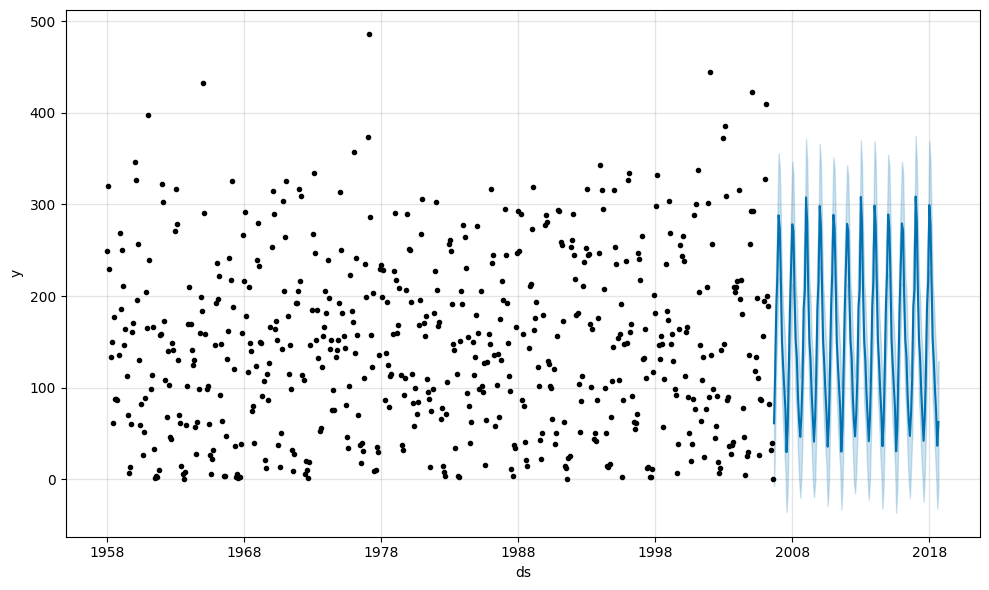

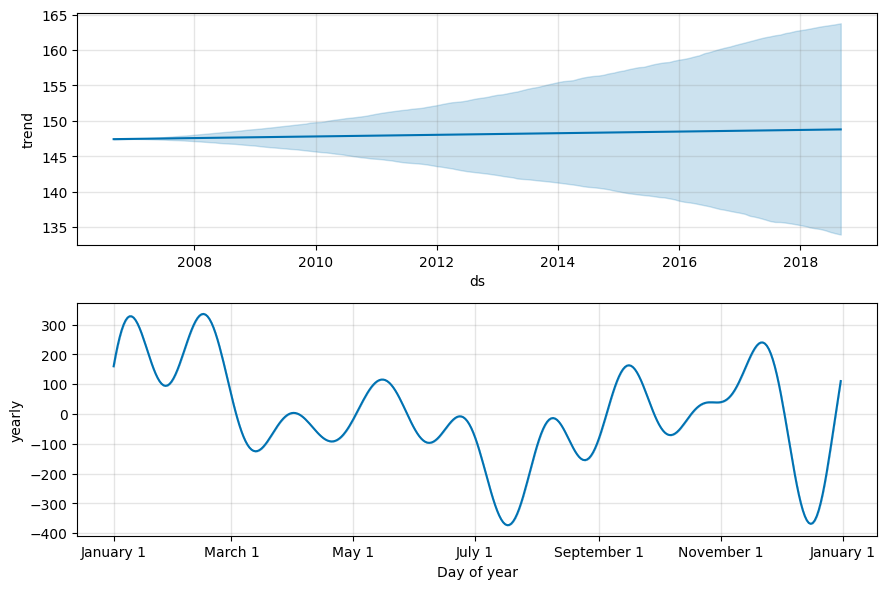

In [65]:
fig1 = modelprophet.plot(forecastpro)
fig2 = modelprophet.plot_components(forecastpro)

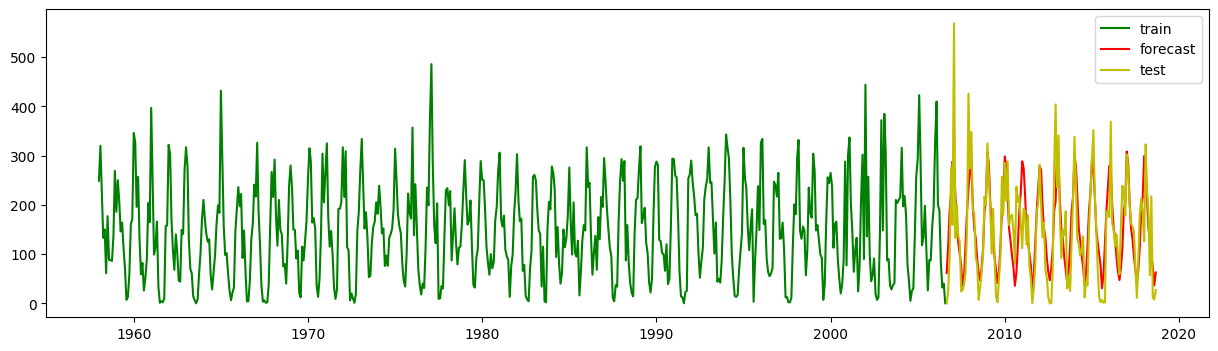

In [66]:
# show forecast 30 days ahead
plt.figure(figsize=(15,4))
plt.plot(traindf.set_index('ds')['y'], label='train', color='green')
plt.plot(forecastpro.set_index('ds')['yhat'], label='forecast', color='red')
plt.plot(testdf.set_index('DATE')['CH'], label='test', color='y')
plt.legend()
plt.show()

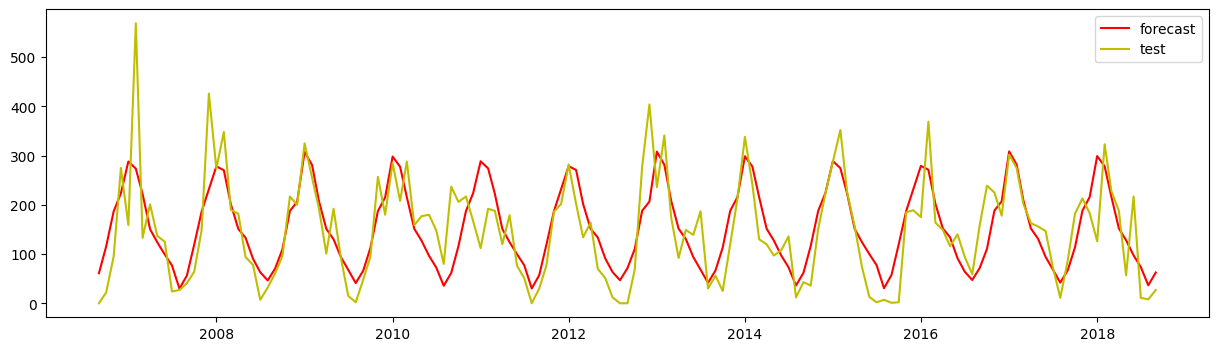

In [67]:
# show forecast 30 days ahead
plt.figure(figsize=(15,4))
# plt.plot(traindf.set_index('ds')['y'], label='train', color='green')
plt.plot(forecastpro.set_index('ds')['yhat'], label='forecast', color='red')
plt.plot(testdf.set_index('DATE')['CH'], label='test', color='y')
plt.legend()
plt.show()

### Perbandingan dan Evaluasi Hasil Model

#### Perbandingan Hasil Forecasting

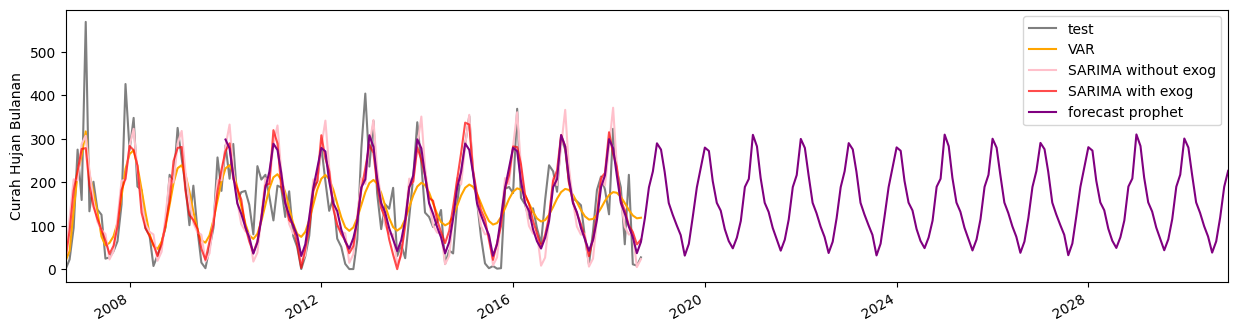

In [83]:
# show forecast 30 days ahead
plt.figure(figsize=(15,4))
# plt.plot(traindf.set_index('ds')['y'], label='train', color='green')
plt.plot(testdf.set_index('DATE')['CH'], label='test', color='k', alpha=0.5)

dfvar['CH'].plot(color='orange', label='VAR').autoscale(axis='x', tight=True)
#df_varma['CH'].plot(color='brown', label='VARMA').autoscale(axis='x', tight=True)
fcastwx['mean'].plot(color='pink', label='SARIMA without exog')
fcastsarimaexog['mean'].plot(color='red', label='SARIMA with exog', alpha=0.7)
plt.plot(forecastpro.set_index('ds')['yhat'], label='forecast prophet', color='purple')

plt.xlabel('')
plt.ylabel('Curah Hujan Bulanan')

plt.legend()
plt.show()

Keseluruhan model cenderung memiliki hasil prediksi yang serupa. Berdasarkan grafik tersebut, kita bisa melihat bahwa model SARIMA dengan/tanpa mengikutsertakan variabel bebas dan model prophet memiliki pola yang mendekati hasil aktual. Namun, model belum cukup baik karena pada sejumlah kasus ekstrem dengan curah hujan tinggi ataupun curah hujan rendah belum bisa diprediksi secara akurat.

C:\Users\ACER\AppData\Local\Temp\ipykernel_25896\4068223814.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(testdf.set_index('DATE')[year]['CH'], label='test', color='k', alpha=0.5)
C:\Users\ACER\AppData\Local\Temp\ipykernel_25896\4068223814.py:7: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  dfvar[year]['CH'].plot(color='orange', label='VAR').autoscale(axis='x', tight=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_25896\4068223814.py:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` i

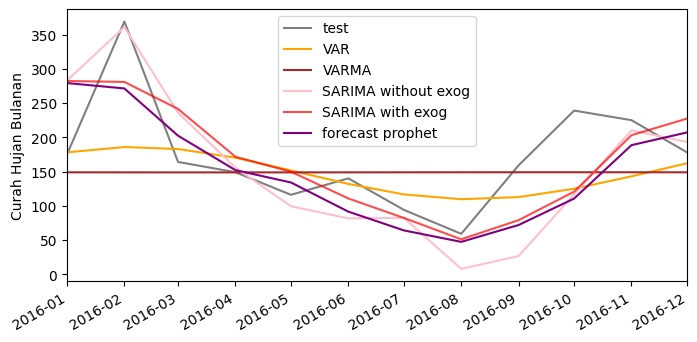

In [82]:
# show forecast 30 days ahead
year = '2016'
plt.figure(figsize=(8,4))
# plt.plot(traindf.set_index('ds')['y'], label='train', color='green')
plt.plot(testdf.set_index('DATE')[year]['CH'], label='test', color='k', alpha=0.5)

dfvar[year]['CH'].plot(color='orange', label='VAR').autoscale(axis='x', tight=True)
df_varma[year]['CH'].plot(color='brown', label='VARMA').autoscale(axis='x', tight=True)
fcastwx[year]['mean'].plot(color='pink', label='SARIMA without exog')
fcastsarimaexog[year]['mean'].plot(color='red', label='SARIMA with exog', alpha=0.7)
plt.plot(forecastpro.set_index('ds')[year]['yhat'], label='forecast prophet', color='purple')

plt.xlabel('')
plt.ylabel('Curah Hujan Bulanan')
plt.legend()
plt.show()

#### Evaluasi Model

In [70]:
print('Evaluation by RMSE')
print(f"VAR: {np.sqrt(mse(testdf['CH'], dfvar['CH']))}")
print(f"VARMA: {np.sqrt(mse(testdf['CH'], df_varma['CH']))}")
print(f"SARIMA w/o exog: {np.sqrt(mse(testdf['CH'], fcastwx['mean']))}")
print(f"SARIMA w/ exog: {np.sqrt(mse(testdf['CH'], fcastsarimaexog['mean']))}")
print(f"Prophet: {np.sqrt(mse(testdf['CH'], forecastpro['yhat']))}")


Evaluation by RMSE
VAR: 73.73446193275797
VARMA: 96.30946665075005
SARIMA w/o exog: 69.7244961723518
SARIMA w/ exog: 67.41215853345133
Prophet: 66.42437652656979


In [71]:
from sklearn.metrics import mean_absolute_error as mae
print('Evaluation by MAE')
print(f"VAR: {(mae(testdf['CH'], dfvar['CH']))}")
print(f"VARMA: {(mae(testdf['CH'], df_varma['CH']))}")
print(f"SARIMA w/o exog: {(mae(testdf['CH'], fcastwx['mean']))}")
print(f"SARIMA w/ exog: {(mae(testdf['CH'], fcastsarimaexog['mean']))}")
print(f"Prophet: {(mae(testdf['CH'], forecastpro['yhat']))}")

Evaluation by MAE
VAR: 57.934084791586415
VARMA: 77.73115653862457
SARIMA w/o exog: 50.05692304714624
SARIMA w/ exog: 49.25551571192656
Prophet: 49.311618901335684


In [72]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE
print('Evaluation by MAPE')
print(f"VAR: {(MAPE(testdf['CH'], dfvar['CH'])/10**15)}")
print(f"VARMA: {(MAPE(testdf['CH'], df_varma['CH'])/10**15)}")
print(f"SARIMA w/o exog: {(MAPE(testdf['CH'], fcastwx['mean'])/10**15)}")
print(f"SARIMA w/ exog: {(MAPE(testdf['CH'], fcastsarimaexog['mean'])/10**15)}")
print(f"Prophet: {(MAPE(testdf['CH'], forecastpro['yhat'])/10**15)}")

Evaluation by MAPE
VAR: 8.60873930149328
VARMA: 16.001748247293143
SARIMA w/o exog: 2.9393568873623286
SARIMA w/ exog: 3.6362335388385465
Prophet: 6.505346916538557


Urutan Model Terbaik Berdasarkan Berbagai Parameter EValuasi :
- RMSE : Prophet - SARIMA exog - SARIMA - VAR - VARMA
- MAE : SARIMA exog - Prophet - SARIMA - VAR - VARMA
- MAPE : SARIMA - SARIMA exog - Prophet - VAR - VARMA

Bila Kita buat skor ranking, maka model terbaik jatuh kepada:

In [73]:
print(f'Skor Ranking')
print(f'Prophet : {5+4+3}')
print(f'SARIMA exog : {4+5+4}')
print(f'SARIMA : {3+3+5}')
print(f'VAR : {2+2+2}')
print(f'VARMA : {1+1+1}')

Skor Ranking
Prophet : 12
SARIMA exog : 13
SARIMA : 11
VAR : 6
VARMA : 3


# Conclusion

Model terbaik merupakan model SARIMA(3,1,1)(3,1,4)24 dengan variabel exog / prediktan, meliputi PDO, QBO, dan SOI.

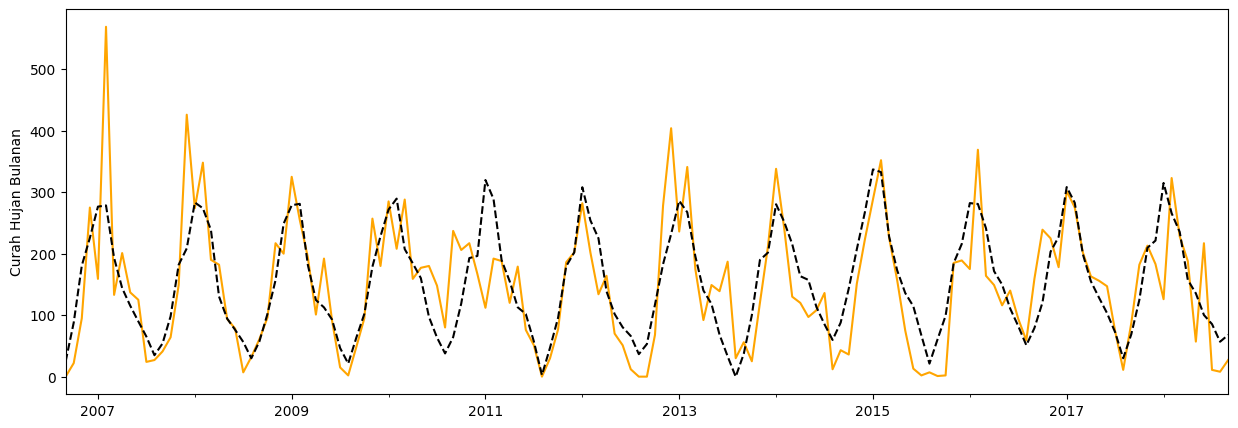

In [84]:
fig, ax = plt.subplots(figsize = (15, 5))

test['CH'].plot(ax=ax, color='orange')
fcastsarimaexog['mean'].plot(ax=ax, style='k--')

plt.xlabel('')
plt.ylabel('Curah Hujan Bulanan')

plt.show()

Namun, kelemahan dari model ini adalah keperluan hasil prediksi pada variabel yang akan dijadikan sebagai prediktannya. Untuk itu, model prophet dapat dijadikan sebagai alternatif kedua untuk memprediksi curah hujan.

In [75]:
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Tanggal awal
start_date = datetime(2010, 1, 1)

# Tanggal akhir (tahun 2030 dan bulan Desember)
end_date = datetime(2030, 12, 1)

# Membuat sequence tanggal
current_date = start_date
date_sequence = []

while current_date <= end_date:
    date_sequence.append(current_date)
    # Menambah satu bulan ke tanggal saat ini
    current_date = current_date + relativedelta(months=1)

# Membuat Series dari sequence tanggal
date_series = pd.Series(date_sequence)

# Menampilkan hasil
print(date_series)


0     2010-01-01
1     2010-02-01
2     2010-03-01
3     2010-04-01
4     2010-05-01
         ...    
247   2030-08-01
248   2030-09-01
249   2030-10-01
250   2030-11-01
251   2030-12-01
Length: 252, dtype: datetime64[ns]


In [76]:
future = pd.DataFrame()
future['ds'] = date_series
forecastpro = modelprophet.predict(future)
forecastpro

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-01-01  147.795818  231.784042  358.228849   147.795818   147.795818   
1   2010-02-01  147.805547  210.353995  346.242957   147.805547   147.805547   
2   2010-03-01  147.814334  149.995571  281.641738   147.814334   147.814334   
3   2010-04-01  147.824062   88.982238  220.649929   147.824062   147.824062   
4   2010-05-01  147.833477   59.113041  195.807813   147.827249   147.833564   
..         ...         ...         ...         ...          ...          ...   
247 2030-08-01  150.154821  -33.628067  111.997263   118.465731   182.058980   
248 2030-09-01  150.164550  -12.181338  141.703524   118.270630   182.355622   
249 2030-10-01  150.173964   48.399206  189.391309   118.075215   182.662348   
250 2030-11-01  150.183693  121.157013  261.273267   117.880114   182.969931   
251 2030-12-01  150.193107  149.183021  299.835995   117.684699   183.254190   

     additive_terms  additive_terms_lower  additive_terms_upper      yearly  \
0        150.425529            150.425529            150.425529  150.425529   
1        129.649618            129.649618            129.649618  129.649618   
2         67.617465             67.617465             67.617465   67.617465   
3          3.424016              3.424016              3.424016    3.424016   
4        -20.676957            -20.676957            -20.676957  -20.676957   
..              ...                   ...                   ...         ...   
247     -112.250694           -112.250694           -112.250694 -112.250694   
248      -86.278623            -86.278623            -86.278623  -86.278623   
249      -31.866016            -31.866016            -31.866016  -31.866016   
250       39.301266             39.301266             39.301266   39.301266   
251       75.971730             75.971730             75.971730   75.971730   

     yearly_lower  yearly_upper  multiplicative_terms  \
0      150.425529    150.425529                   0.0   
1      129.649618    129.649618                   0.0   
2       67.617465     67.617465                   0.0   
3        3.424016      3.424016                   0.0   
4      -20.676957    -20.676957                   0.0   
..            ...           ...                   ...   
247   -112.250694   -112.250694                   0.0   
248    -86.278623    -86.278623                   0.0   
249    -31.866016    -31.866016                   0.0   
250     39.301266     39.301266                   0.0   
251     75.971730     75.971730                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper        yhat  
0                           0.0                         0.0  298.221348  
1                           0.0                         0.0  277.455165  
2                           0.0                         0.0  215.431799  
3                           0.0                         0.0  151.248079  
4                           0.0                         0.0  127.156520  
..                          ...                         ...         ...  
247                         0.0                         0.0   37.904127  
248                         0.0                         0.0   63.885926  
249                         0.0                         0.0  118.307948  
250                         0.0                         0.0  189.484959  
251                         0.0                         0.0  226.164837  

[252 rows x 16 columns]

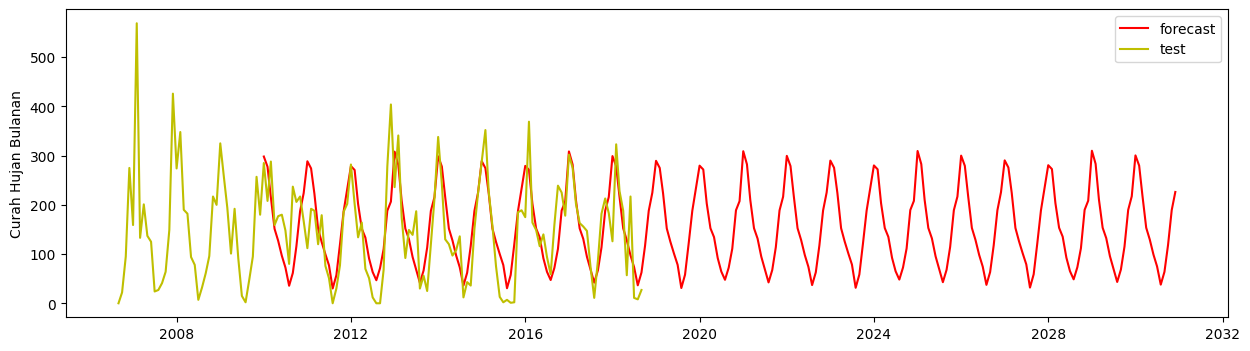

In [85]:
# show forecast 30 days ahead
plt.figure(figsize=(15,4))
plt.plot(forecastpro.set_index('ds')['yhat'], label='forecast', color='red')
plt.plot(testdf.set_index('DATE')['CH'], label='test', color='y')

plt.xlabel('')
plt.ylabel('Curah Hujan Bulanan')

plt.legend()
plt.show()

# Referensi

Firmana F, Nurmalina R, Rifin A. 2016. Efisiensi teknis usahatani padi di Kabupaten Karawang dengan pendekatan dta envelopment analysis (DEA). Forum Agribisnis. 6(2). 

Ruminta. 2016. Analisis penurunan produksi tanaman padi akibat perubahan iklim di Kabupaten Bandung, Jawa Barat. Jurnal Kultivasi. 15(1):37-45.